In [176]:
from functools import partial

import numpy as np
import torch
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import check_grad

In [24]:
sns.set_style("darkgrid")

In [25]:
torch.cuda.is_available()

True

In [26]:
X_train = np.load('data/comp0090_assignment_1_data/fashion-train-imgs.npz')
y_train = np.load('data/comp0090_assignment_1_data/fashion-train-labels.npz')
X_val = np.load('data/comp0090_assignment_1_data/fashion-dev-imgs.npz')
y_val = np.load('data/comp0090_assignment_1_data/fashion-dev-imgs.npz')
X_test = np.load('data/comp0090_assignment_1_data/fashion-test-imgs.npz')
y_test = np.load('data/comp0090_assignment_1_data/fashion-test-labels.npz')

In [27]:
X_train[:, :, 0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

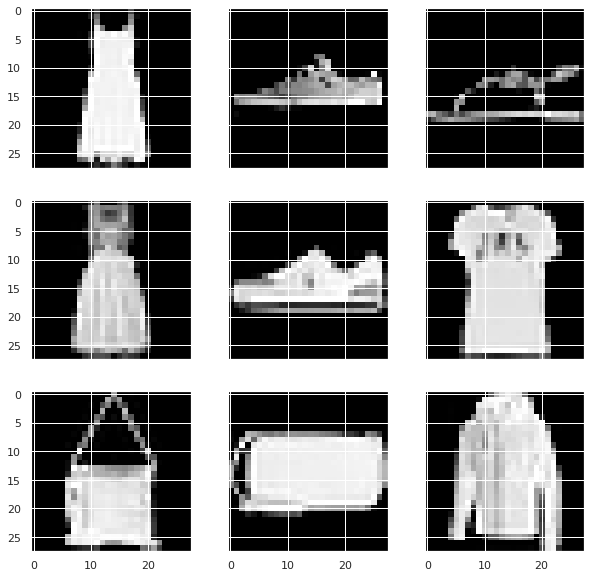

In [28]:
nrows = 3

fig, axs = plt.subplots(nrows=nrows, ncols=nrows, sharex=True, sharey=True, figsize=[10, 10])

with sns.axes_style("white"):
    for row in axs:
        for ax in row:
            ax.imshow(np.transpose(X_train[:, :, np.random.randint(X_train.shape[2])]), cmap='gray')


loss function is:

$$
\mathcal{L} = - \frac{1}{n} \sum^{n}_{i=1} \frac{(y_i - \hat{y}_i)^2}{2}
$$

then derivative is

$$
\frac{\partial \mathcal{l}}{\partial w_j} = - \frac{1}{n} \sum^{n}_{i=1} x_j (y_i - \hat{y}_i) \\

\frac{\partial \mathcal{l}}{\partial b} = - \frac{1}{n} \sum^{n}_{i=1} (y_i - \hat{y}_i)

$$

In [308]:
def get_record(data, i=0):
    return data[:, i]

def get_record_2d(data, i=0):
    return data[:, :, i]

def flatten_all_x(X):
    return X.reshape(-1, X.shape[-1])

In [309]:
X_train_flat = flatten_all_x(X_train)

In [310]:
np.random.seed(42)

weights = np.random.normal(0, 1, get_record(X_train_flat).shape)
b =  np.random.normal(0, 1)

In [311]:
weights

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [312]:
def affine(x, w, b):
    return w @ x + b

def logit(x, w, b):
    return 1 / (1 + np.exp(- affine(x, w, b)))

def logit_grad(x, w, b):
    return logit(x, w, b) * (1 - logit(x, w, b))

In [313]:
predictions = logit(X_train_flat, weights, b)

In [314]:
predictions

array([0.00294344, 0.33870484, 0.00133591, ..., 0.8507556 , 0.0151819 ,
       0.00423735])

In [315]:
predictions.shape

(12000,)

In [316]:
np.min(predictions), np.max(predictions)

(5.385117999766151e-14, 0.9999999982556944)

In [317]:
def square_loss(x, y, w, b):
    return 1 / (2 * x.shape[-1]) * np.sum((y - logit(x, w, b)) ** 2)

In [318]:
square_loss(X_train_flat, y_train, weights, b)

0.2688236510464293

In [319]:
def square_loss_grad_w(x, y, w, b):
    return (-1 / x.shape[-1]) * (x @ ((y - logit(x, w, b)) * logit_grad(x, w, b)))

In [320]:
square_loss_grad_w(X_train_flat, y_train, weights, b)


array([ 1.58983862e-04,  1.58937668e-04,  1.58104986e-04,  1.51442220e-04,
        1.36592546e-04,  1.05886136e-04,  6.00734629e-05, -2.02401607e-05,
       -6.80187552e-05, -1.50276120e-04, -2.42122883e-04, -2.83490640e-04,
       -3.62445534e-04, -4.49406411e-04, -4.98236954e-04, -2.44724766e-04,
       -4.75212871e-05, -1.43815538e-04, -2.65012296e-04, -3.16400415e-04,
       -3.54230205e-04, -2.17905009e-04, -8.84596476e-05,  4.18335662e-05,
        1.17945755e-04,  1.41867077e-04,  1.49109362e-04,  1.58874637e-04,
        1.58787263e-04,  1.55596742e-04,  1.46516356e-04,  1.09308264e-04,
        7.40941180e-05, -7.63751004e-05, -2.86143753e-04, -5.06889395e-04,
       -7.44430748e-04, -1.02922287e-03, -1.36027604e-03, -1.74235383e-03,
       -2.00716383e-03, -1.99481258e-03, -1.77478794e-03, -1.09604842e-03,
       -8.61769891e-04, -9.52807006e-04, -1.43687566e-03, -1.59517634e-03,
       -1.40220775e-03, -1.06508030e-03, -6.74635628e-04, -3.54367466e-04,
       -1.92188223e-04, -

In [321]:
def add_to_array(array, i, delta):
    array = np.array(array)
    array[i] += delta
    return array

def square_loss_finite_diff_wi(x, y, w, b, i, epsilon=0.001):
    w_plus_d = add_to_array(w, i, epsilon)
    w_minus_d = add_to_array(w, i, -epsilon)

    return 1 / (2 * epsilon) * (square_loss(x, y, w_plus_d, b) - square_loss(x, y, w_minus_d, b))

In [322]:
square_loss_grad_w(X_train_flat[:, :10], y_train[:10], weights, b)

array([0.00099399, 0.00099399, 0.00099399, 0.00099399, 0.00099399,
       0.00099391, 0.00099386, 0.00099399, 0.00099399, 0.00099399,
       0.00099346, 0.00099399, 0.00105347, 0.00099396, 0.00099396,
       0.0021245 , 0.00289693, 0.000994  , 0.00099403, 0.00105349,
       0.00099399, 0.00099399, 0.00099399, 0.00099398, 0.00099399,
       0.00099398, 0.00099399, 0.00099399, 0.00099399, 0.00099399,
       0.00099399, 0.00099394, 0.00099385, 0.00099378, 0.00099378,
       0.00099378, 0.00099378, 0.00099392, 0.00099388, 0.00099384,
       0.00099383, 0.00099381, 0.00185657, 0.00515573, 0.0049333 ,
       0.00173531, 0.0008726 , 0.00096195, 0.0009808 , 0.00097141,
       0.00099394, 0.00099398, 0.00099398, 0.00099398, 0.00099398,
       0.00099399, 0.00099399, 0.00099399, 0.00099387, 0.00099378,
       0.00099379, 0.00099379, 0.00099381, 0.00099388, 0.00099382,
       0.00099378, 0.00099392, 0.00099399, 0.00099399, 0.00099398,
       0.00424668, 0.00417928, 0.00419032, 0.00428068, 0.00212

In [323]:
square_loss_finite_diff_wi(X_train_flat[:, :10], y_train[10], weights, b, 0)

-0.002000729567214199